# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)



5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

In [2]:
def show_compare_of_filters(img):
    filters = [np.ones((3,3), np.float32)/9, np.ones((5,5))/25, np.ones((9,9))/81, np.ones((15,15))/225, np.ones((35,35))/1225]

    _, axis = plt.subplots(5, 3, figsize=(5, 10))
    for index, f in enumerate(filters):
        out = cv2.filter2D(src=img, ddepth=-1, kernel=f)
        # out = signal.convolve2d(img, f, mode='same')
        axis[index, 0].imshow(img, 'gray')
        axis[index, 1].imshow(out, 'gray')
        axis[index, 2].imshow(np.abs(out-img.astype(np.int16)), 'gray')
        axis[index, 0].axis('off')
        axis[index, 1].axis('off')
        axis[index, 2].axis('off')
    plt.tight_layout()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

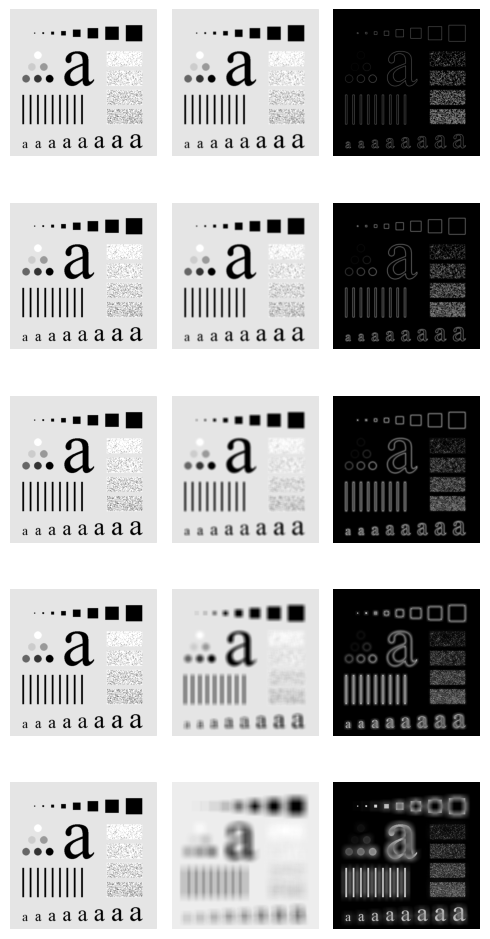

In [3]:
plansza = cv2.imread('plansza.png', cv2.IMREAD_GRAYSCALE)
show_compare_of_filters(plansza)

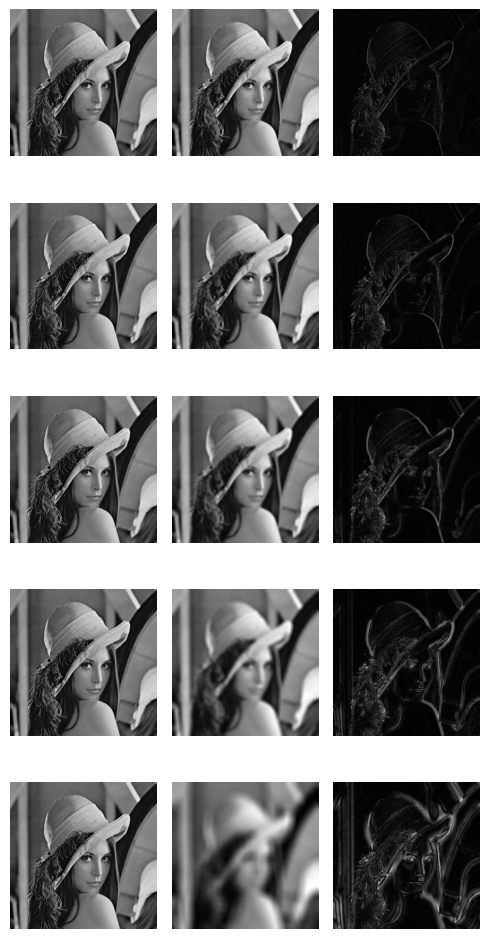

In [4]:
lena = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
show_compare_of_filters(lena)


7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

(-0.5, 511.5, 511.5, -0.5)

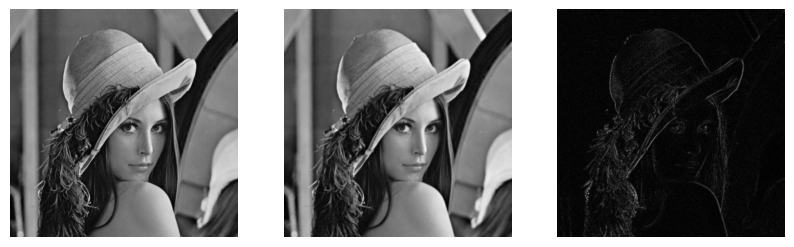

In [5]:
lena = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = M / sum(sum(M))
out = cv2.filter2D(src=lena, ddepth=-1, kernel=M)
difference = cv2.absdiff(lena, out)

f, axis = plt.subplots(1, 3, figsize=(10, 5))
axis[0].imshow(lena, 'gray')
axis[1].imshow(out, 'gray')
axis[2].imshow(difference, 'gray')
axis[0].axis('off')
axis[1].axis('off')
axis[2].axis('off')



8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


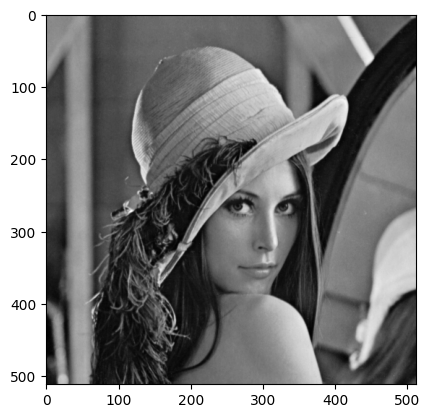

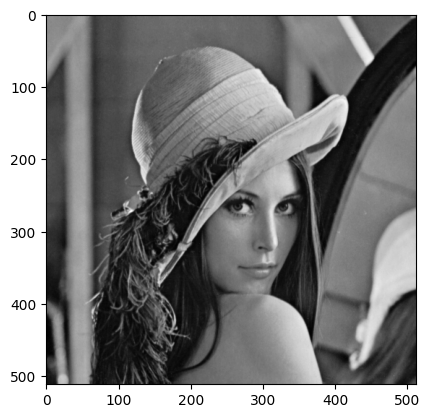

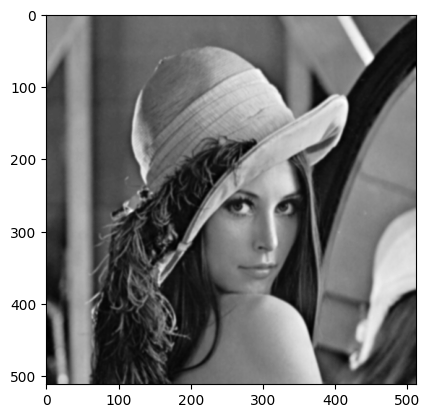

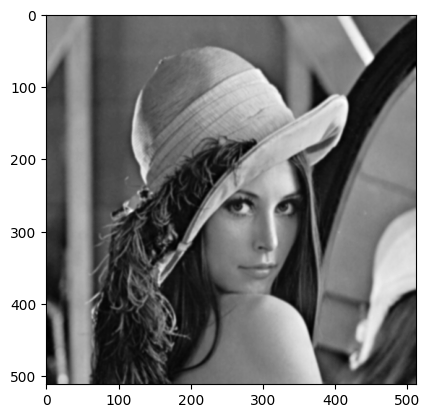

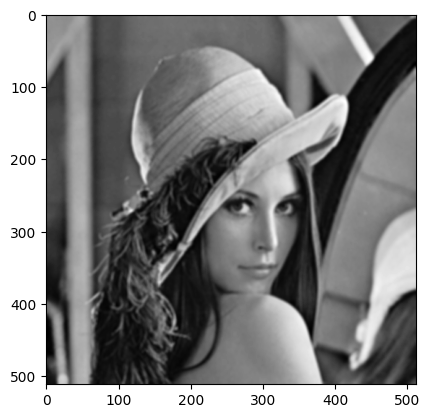

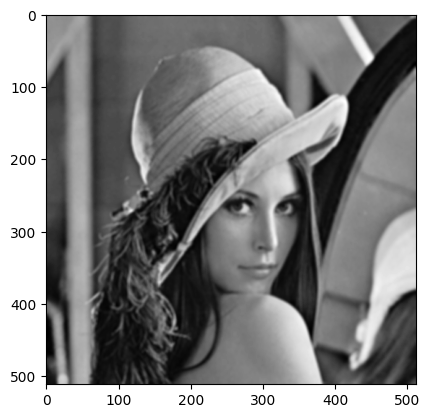

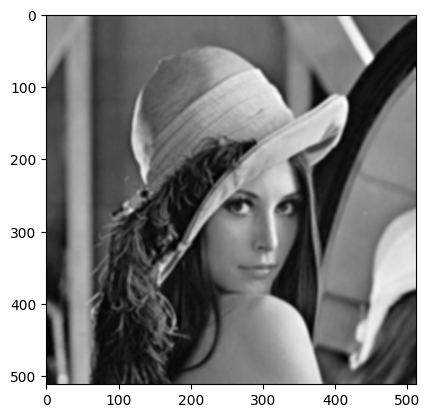

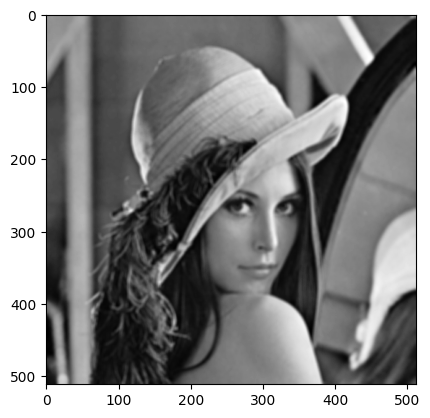

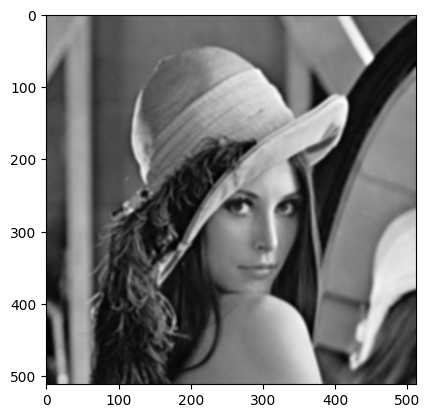

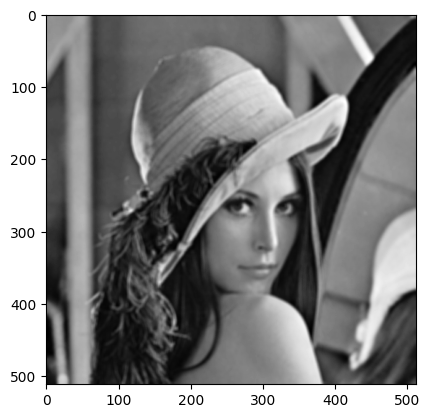

In [6]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    
odchylenina = [0.5, 1, 2, 4, 8]
for o in odchylenina:
    # mesh(fgaussian(5, o), 5)
    out = cv2.filter2D(lena, -1, fgaussian(5, o))
    plt.imshow(out, 'gray')
    plt.show()
    # plt.imshow(cv2.GaussianBlur(lena, (5,5), o), 'gray')
    lena_guas = cv2.GaussianBlur(lena, (5,5), o)
    plt.imshow(lena_guas, 'gray')
    plt.show()
    # mesh(cv2.GaussianBlur(lena, (5,5), o), 512)


### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


In [7]:
def print_img_out_diff(img, out, title):
    difference = cv2.absdiff(img, out)
    fig, axis = plt.subplots(1, 3, figsize=(10, 5))
    fig.suptitle(title)
    axis[0].imshow(img, 'gray')
    axis[1].imshow(out, 'gray')
    axis[2].imshow(difference, 'gray')
    axis[0].axis('off')
    axis[1].axis('off')
    axis[2].axis('off')

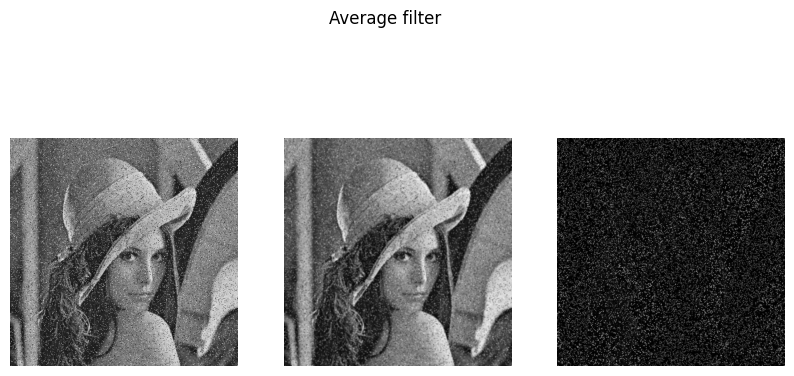

In [8]:
img = cv2.imread("lenaSzum.png", cv2.IMREAD_GRAYSCALE)
mask = np.ones((3,3), np.float32)/9
out = cv2.filter2D(src=img, ddepth=-1, kernel=mask)
print_img_out_diff(img, out, "Average filter")

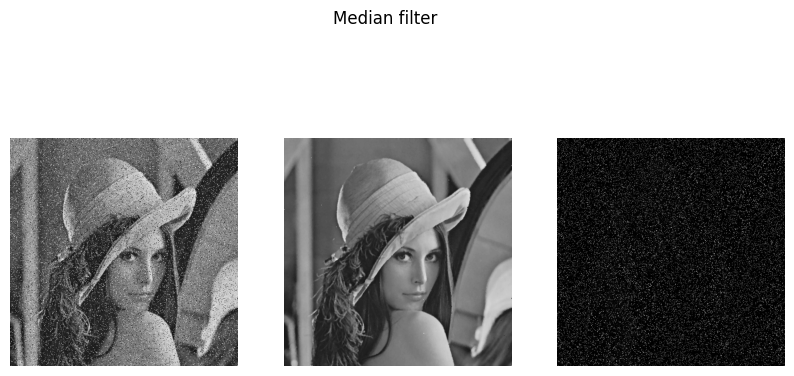

In [9]:
img = cv2.imread("lenaSzum.png", cv2.IMREAD_GRAYSCALE)
out = cv2.medianBlur(img, 3)
print_img_out_diff(img, out, "Median filter")

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

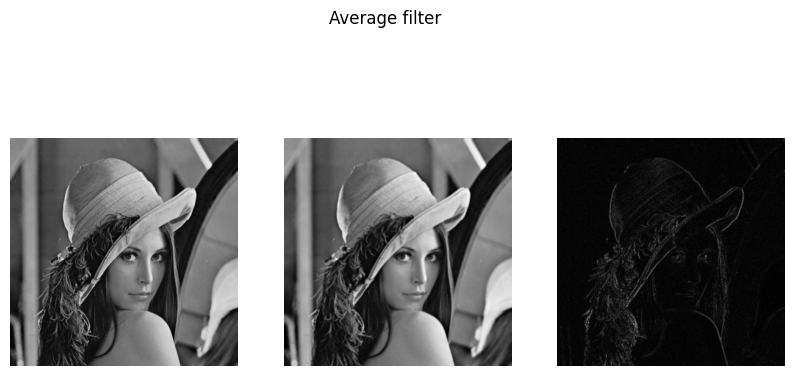

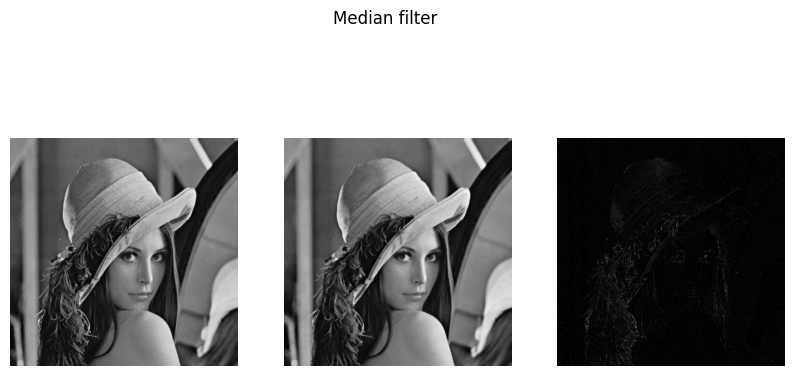

In [10]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

out = cv2.filter2D(src=img, ddepth=-1, kernel=mask)
print_img_out_diff(img, out, "Average filter")
out = cv2.medianBlur(img, 3)
print_img_out_diff(img, out, "Median filter")


3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

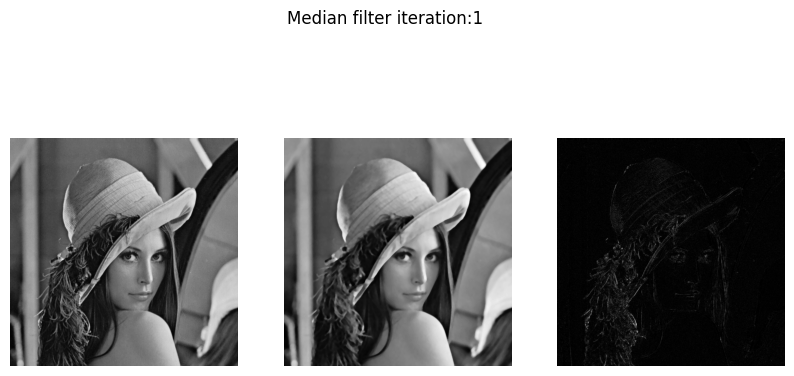

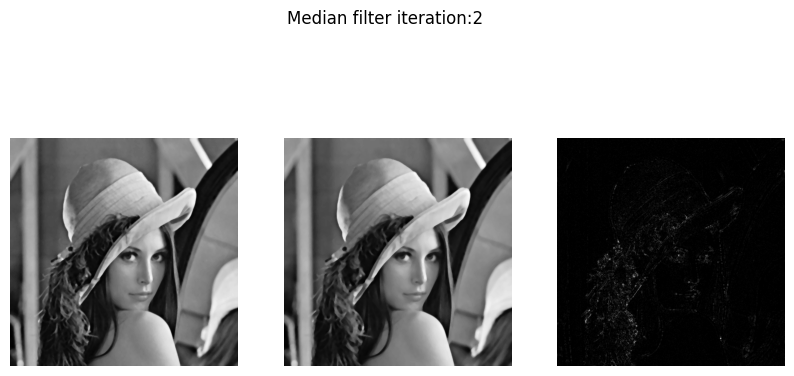

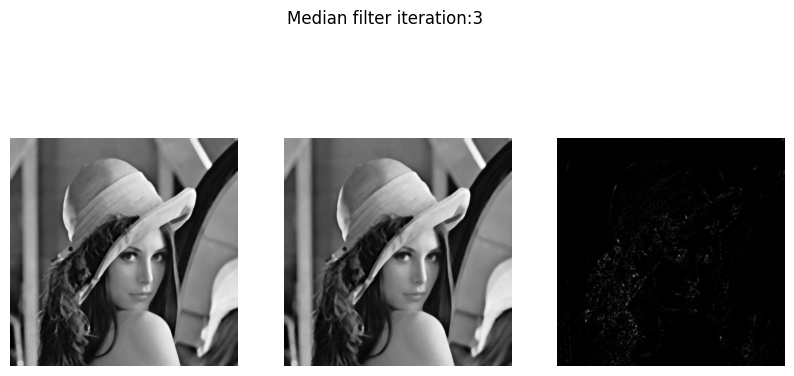

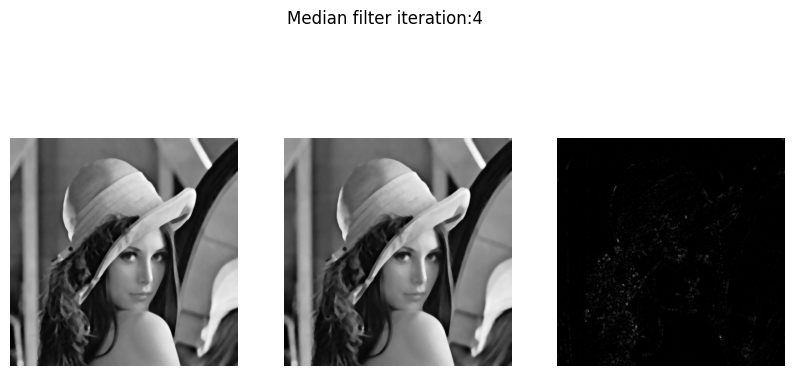

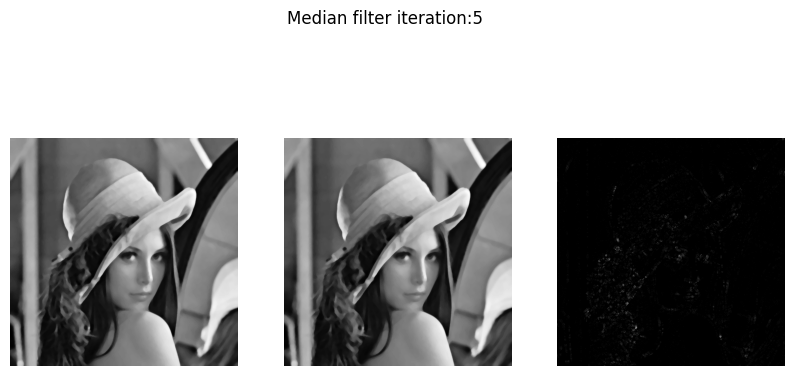

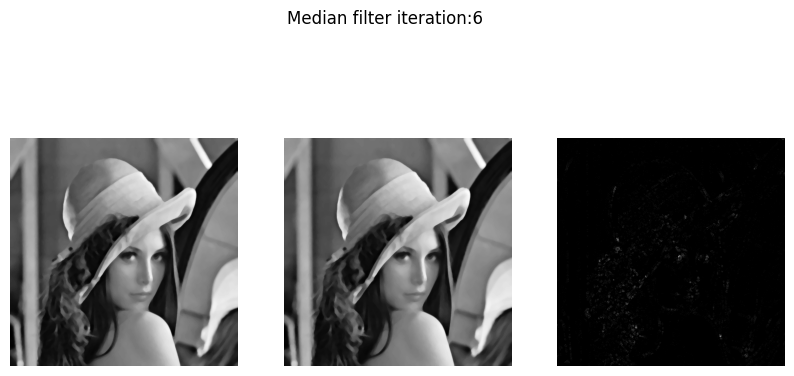

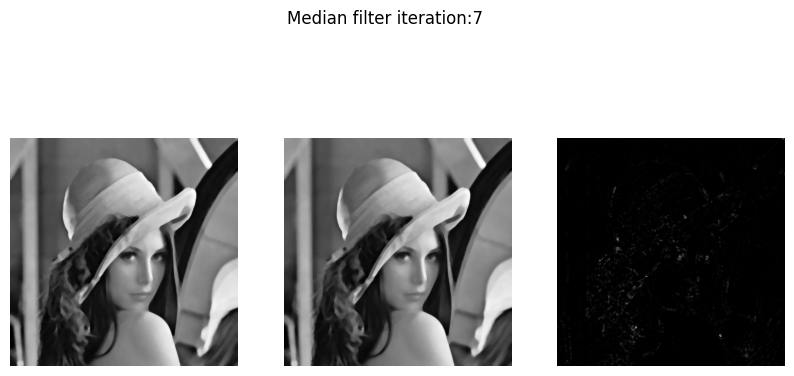

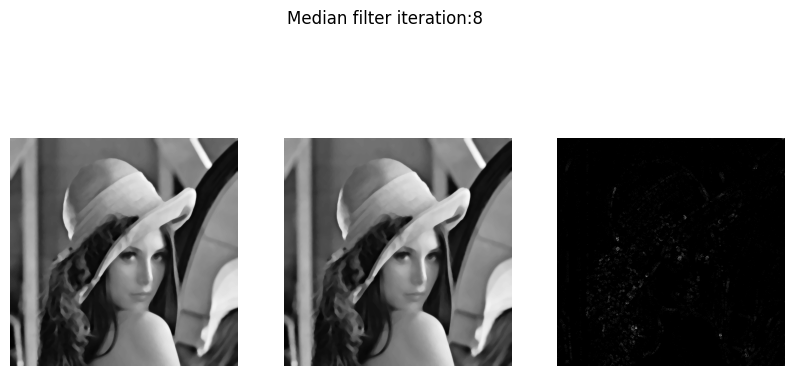

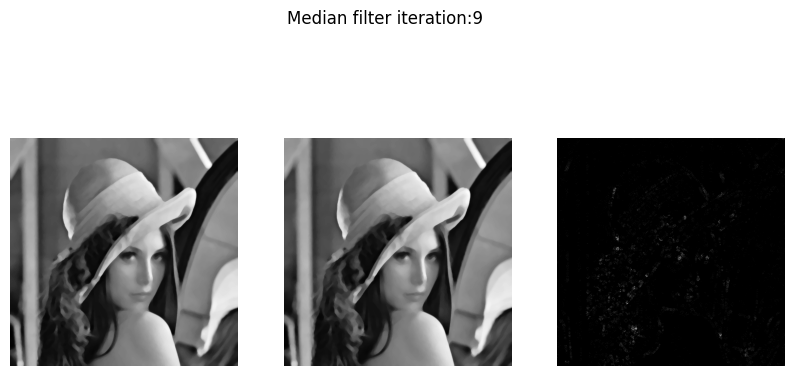

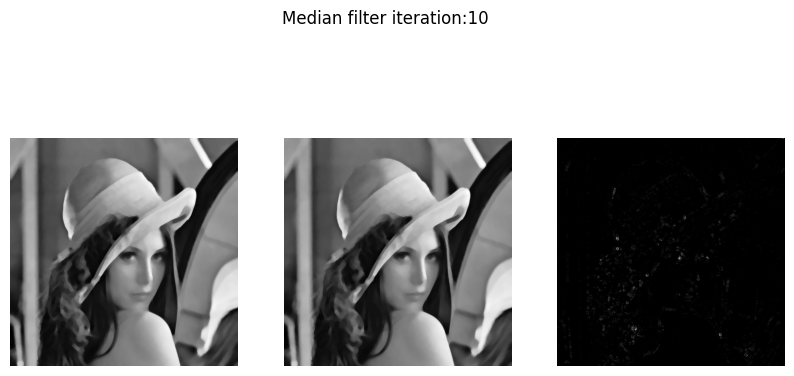

In [11]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
for i in range(10):
    copy = img
    img = cv2.medianBlur(img, 5)
    print_img_out_diff(copy, img, "Median filter iteration:" + str(i+1))


## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach.




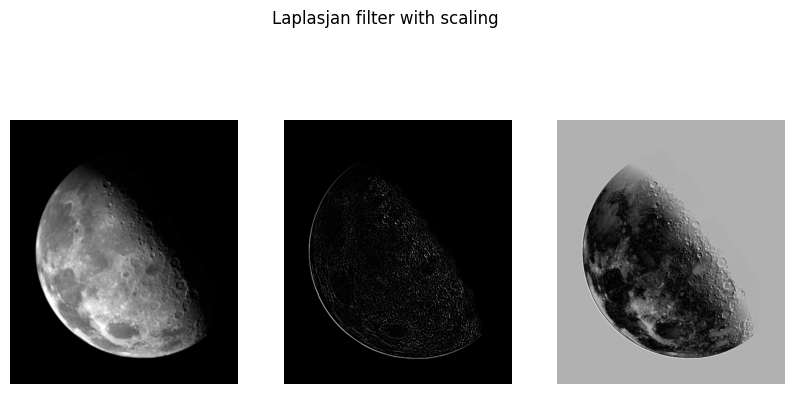

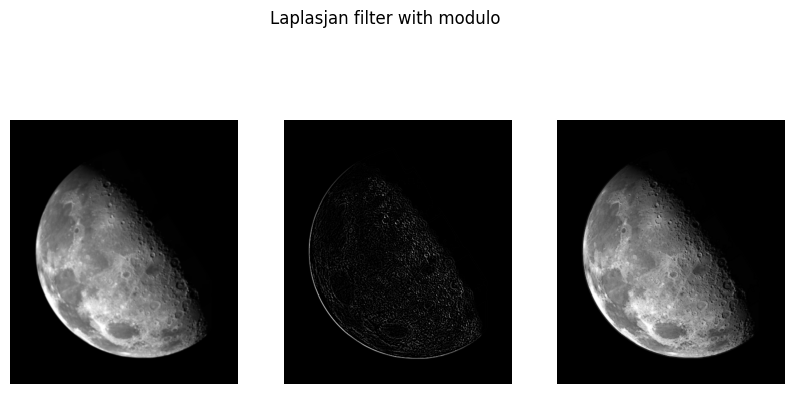

In [12]:
moon = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)
laplasjan_M = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
out = cv2.filter2D(src=moon, ddepth=-1, kernel=laplasjan_M)
norm_128 = out + 128 
print_img_out_diff(moon, norm_128, "Laplasjan filter with scaling")
norm_modulo = cv2.convertScaleAbs(out)
print_img_out_diff(moon, norm_modulo, "Laplasjan filter with modulo")



5. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



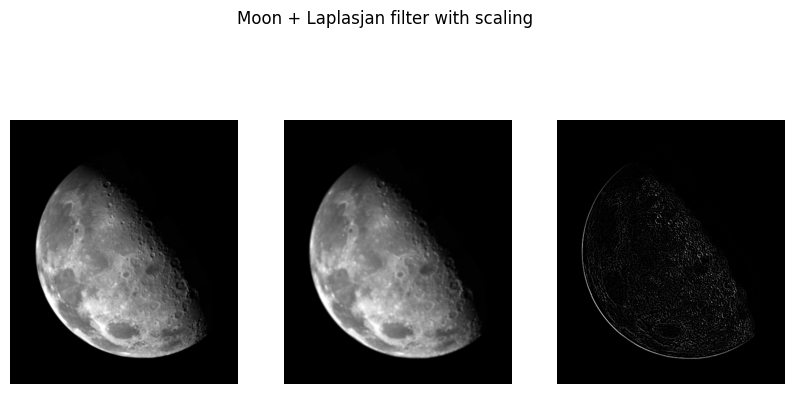

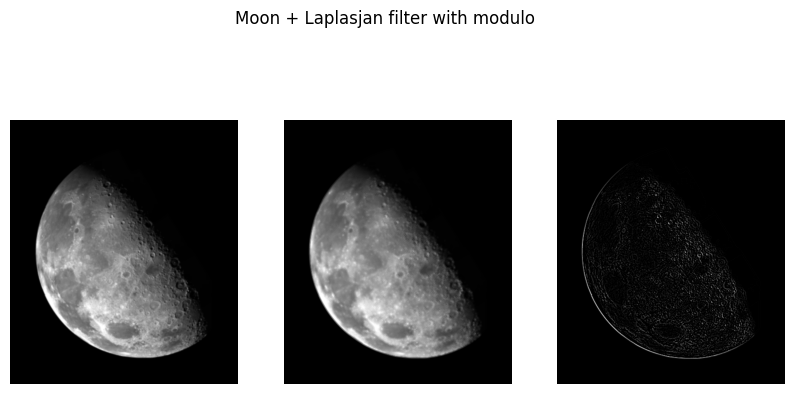

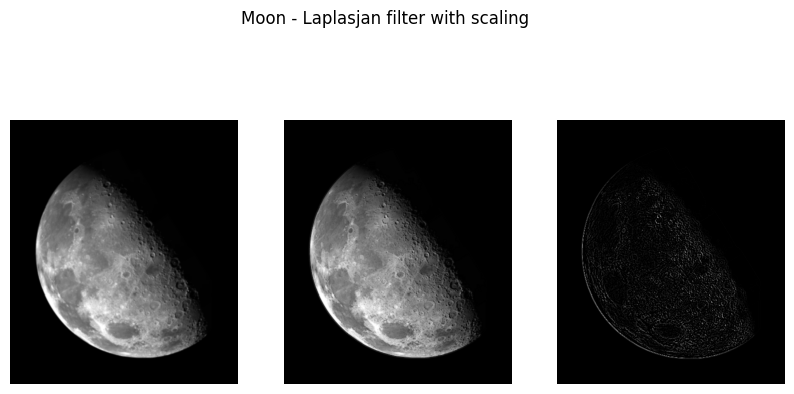

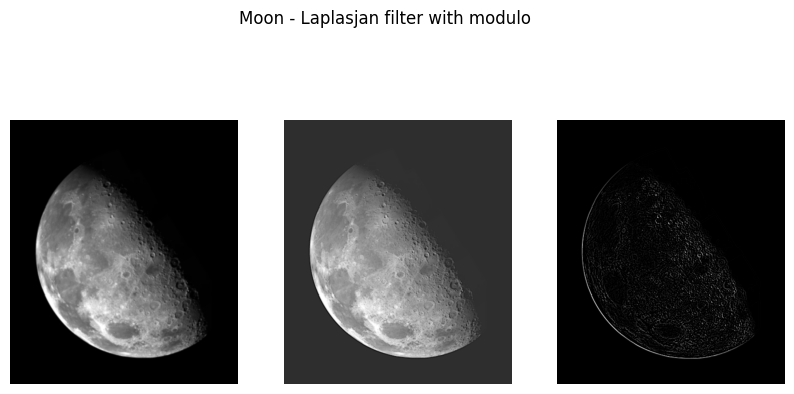

In [13]:
# moon = moon.astype(np.int16)
# norm_128 = norm_128.astype(np.int16)
moon = moon.astype(np.float32)
print_img_out_diff(moon, moon + norm_128, "Moon + Laplasjan filter with scaling")
print_img_out_diff(moon, moon + norm_modulo, "Moon + Laplasjan filter with modulo")

print_img_out_diff(moon, np.abs(moon - out), "Moon - Laplasjan filter with scaling")
print_img_out_diff(moon, moon - norm_modulo, "Moon - Laplasjan filter with modulo")

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

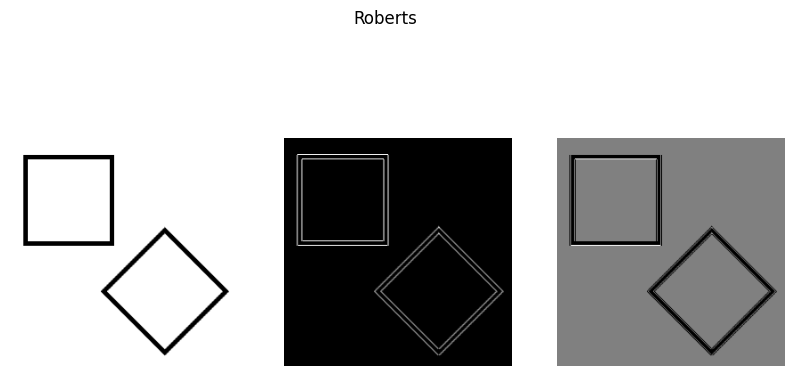

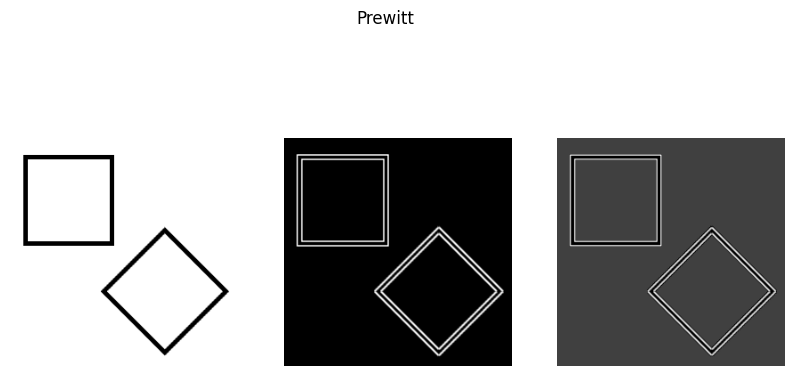

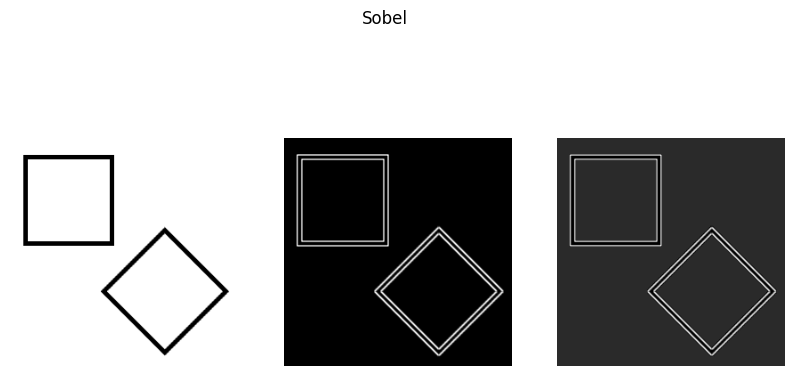

In [14]:
kw = cv2.imread("kw.png", cv2.IMREAD_GRAYSCALE)

R1 = np.array([
    [0, 0, 0],
    [-1, 0, 0],
    [0, 1, 0]
])

R2 = np.array([
    [0, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

P1 = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

P2 = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

S1 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

S2 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
kw = kw.astype(np.float32)
out1 = cv2.filter2D(src=kw, ddepth=-1, kernel=R1)
out2 = cv2.filter2D(src=kw, ddepth=-1, kernel=R2) 
abs_out = np.abs(out1) + np.abs(out2)
print_img_out_diff(kw, abs_out, "Roberts")

out1 = cv2.filter2D(src=kw, ddepth=-1, kernel=P1)
out2 = cv2.filter2D(src=kw, ddepth=-1, kernel=P2)
abs_out = np.abs(out1) + np.abs(out2)
print_img_out_diff(kw, abs_out, "Prewitt")

out1 = cv2.filter2D(src=kw, ddepth=-1, kernel=S1)
out2 = cv2.filter2D(src=kw, ddepth=-1, kernel=S2)
abs_out = np.abs(out1) + np.abs(out2)
print_img_out_diff(kw, abs_out, "Sobel")


5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



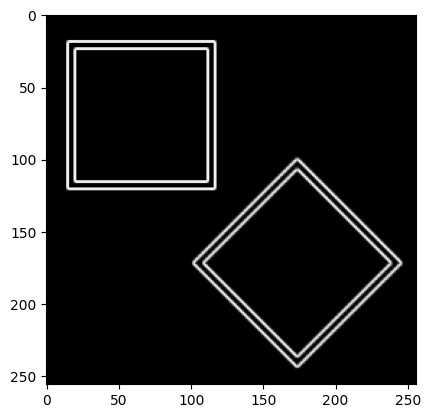

In [15]:
img = cv2.imread("kw.png", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)
out_s1 = cv2.filter2D(src=img, ddepth=-1, kernel=S1)
out_s2 = cv2.filter2D(src=img, ddepth=-1, kernel=S2)
OutW = np.sqrt(np.power(out_s1, 2) + np.power(out_s2, 2))
# print_img_out_diff(img, OutW, "Combined Sobel")
plt.imshow(OutW, 'gray')
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

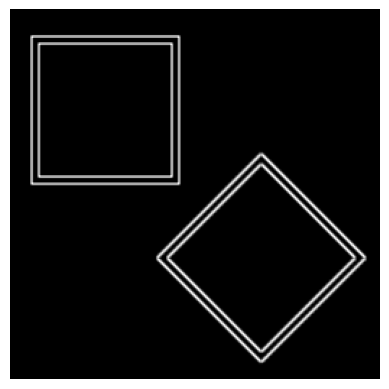

In [16]:

img = cv2.imread("kw.png", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)
out_s1 = cv2.filter2D(src=img, ddepth=-1, kernel=S1)
out_s2 = cv2.filter2D(src=img, ddepth=-1, kernel=S2)
OutW = np.add(np.abs(out_s1), np.abs(out_s2))

plt.imshow(OutW, 'gray')
plt.axis('off')
plt.show()



7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

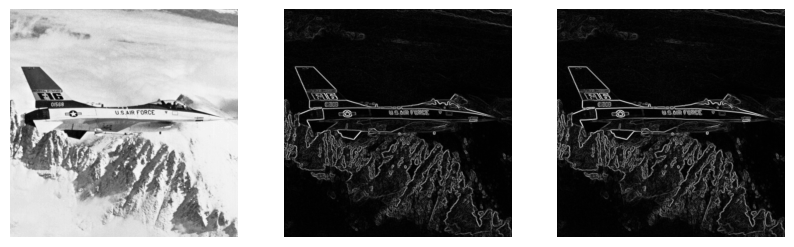

In [17]:
img = cv2.imread("jet.png", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32)
out_s1 = cv2.filter2D(src=img, ddepth=-1, kernel=S1)
out_s2 = cv2.filter2D(src=img, ddepth=-1, kernel=S2)
OutWAbs = np.add(np.abs(out_s1), np.abs(out_s2))
OutWSqrt = np.sqrt(np.power(out_s1, 2) + np.power(out_s2, 2))
fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis[0].imshow(img, 'gray')
axis[1].imshow(OutWAbs, 'gray')
axis[2].imshow(OutWSqrt, 'gray')
axis[0].axis('off')
axis[1].axis('off')
axis[2].axis('off')
plt.show()